In [ ]:
import numpy
# 시그모이드 함수 expit() 사용을 위해 scipy.special 불러오기
import scipy.special
# 행렬을 시각화 하기 위한 라이브러리
import matplotlib.pyplot
# 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

In [ ]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [185]:
import numpy
import scipy.special

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.innodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행령 wih와 who
        # 배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        # w11 w21
        # w12 w22 등
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.innodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    
    # 신경망 학습시키기
    def train(self, input_list, targets_list):
        # 입력 리스트를 2차원의 행렬로 변환
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 들어오는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [186]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# 학습률
learning_rate = 0.01

# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [187]:
# mnist 학습 데이터인 csv 파일 리스트로 불러오기
training_data_file = open('mnist_dataset/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [1]:
# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epoch = 10

for e in range(epoch):
    # 학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        # 입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(output_nodes) + 0.01
        print(targets)
        # all_values[0]은 이 레코드에 대한 결과 값
#         targets[int(all_values[0])] = 0.99
#         n.train(inputs,targets)
#         pass
#     pass

NameError: name 'training_data_list' is not defined

**correct_label:  4
nn answer is 8


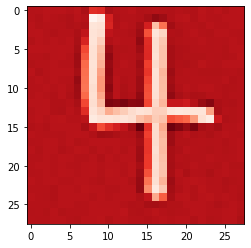

**correct_label:  6
nn answer is 8


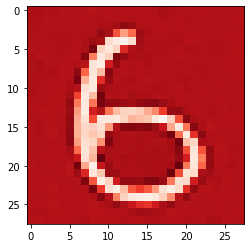

**correct_label:  0
nn answer is 0


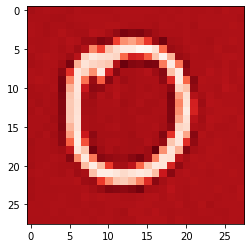

**correct_label:  8
nn answer is 8


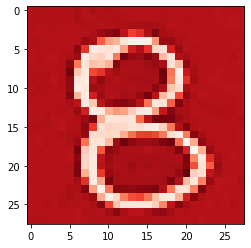

**correct_label:  9
nn answer is 8


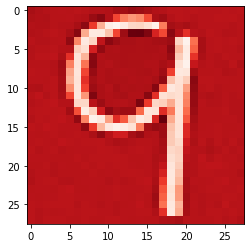

**correct_label:  5
nn answer is 5


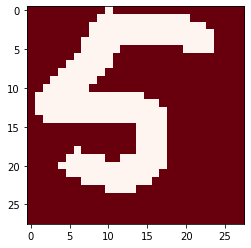

In [189]:
scorecard = []

for image_file_name in glob.glob('my_own_images/2828_my_own_noisy_?.png'):
    
    correct_label = int(image_file_name[-5:-4])
    
    img_array = imageio.imread(image_file_name)
    
    img_array = img_array[:, :, 0] # **컬러를 그레이 스케일로 변환**
    
    img_data = 255.0 - img_array.reshape(784) # 28x28 행렬 값을 784개 값의 리스트로 구성
    img_data = (img_data / 255.0 * 0.99) + 0.01 # 색상 값 반전
        
    outputs = n.query(img_data)
    
    label = numpy.argmax(outputs)
    
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    
    print("**correct_label: ", correct_label)
    print(f"nn answer is {label}")
    
    matplotlib.pyplot.imshow(img_array, cmap='Reds', interpolation='None')
    matplotlib.pyplot.show()
    
    pass

for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    
    correct_label = int(image_file_name[-5:-4])
    
    img_array = imageio.imread(image_file_name)
    
    img_array = img_array[:, :, 0] # **컬러를 그레이 스케일로 변환**
    
    img_data = 255.0 - img_array.reshape(784) # 28x28 행렬 값을 784개 값의 리스트로 구성
    img_data = (img_data / 255.0 * 0.99) + 0.01 # 색상 값 반전
    
    outputs = n.query(img_data)
    
    label = numpy.argmax(outputs)
    
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    
    print("**correct_label: ", correct_label)
    print(f"nn answer is {label}")
    
    matplotlib.pyplot.imshow(img_array, cmap='Reds', interpolation='None')
    matplotlib.pyplot.show()
    
    pass

In [190]:
# 정답의 비율인 성적을 계산해 출력
print(scorecard)
scorecard_array = numpy.asarray(scorecard)
print(f'epochs = {epoch}')
print(f'hidden_nodes = {hidden_nodes}')
print(f'learning_rate = {learning_rate}')
print(f'performance = {scorecard_array.sum()/scorecard_array.size}')
print('201700949 설재혁')

[0, 0, 1, 1, 0, 1]
epochs = 10
hidden_nodes = 200
learning_rate = 0.01
performance = 0.5
201700949 설재혁


## 평가: 처음 손글씨 데이터로 학습시켰을 때 하이퍼 파라미터를 다양한 방법으로 바꿔서 학습시켜봤는데 계속해서 8만 올바르게 인식하고 나머지는 인식을 못하는 결과가 있었다. 그래서 손글씨 이미지가 문제인가 싶어서 조금 더 뚜렷하게 숫자를 쓰고 학습을 시키니 이전보다 개선된 결과를 얻게 됐다. 그렇지만 아직 모든 데이터를 정확하게 인식하지 못하기에 조금의 개선작업이 더 필요할 것 같다.

# 201700949 설재혁